#### Визуализация латентного пространства (статические эмбеддинги TFIDF+SVD, Word2Vec+SVD)

In [1]:
import umap
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
from utils import *

In [3]:
def umap_reduce_dim(X, n):
    params = {
        'min_dist': 0.1, 
        'metric': 'cosine', 
        'n_components': n, 
        'n_neighbors': 100, 
        'random_state': 42
    }
    return umap.UMAP(**params).fit_transform(X)

* *функция понижени размерности (будем переносить данные в 2D пространство и визуализировать)*

In [ ]:
def scatter_plot(X2, y, labels):
    fig, ax = plt.subplots(figsize=(10,6))
    scatter = ax.scatter(X2[:,0], X2[:,1], c=y, s=2, cmap='tab20')
    ax.legend(handles=scatter.legend_elements()[0], labels=labels)

* *функция визуализации данных в 2D пространстве (cmap классный подобрал :)*

In [ ]:
def get_embedding(text, emb_dict):
    
    embs = [emb_dict[w] for w in text.split() if w in emb_dict]
    
    if len(embs) == 0: 
        first_key = next(iter(emb_dict.keys()))
        return np.zeros(emb_dict[first_key].shape)
    
    return np.vstack(embs).mean(axis=0)

* *функция получения эмбеддинга документа (подбробнее в тетрадке 4)*

In [4]:
def get_embeddings(df, emb_dict):
    ge = lambda s: get_embedding(s, emb_dict)
    text_series = df['title'] + ' ' + df['text']
    text_embs = text_series.progress_apply(ge)
    return np.vstack(text_embs.to_numpy())

* *функция извлечения эмбеддингов для всех документов датафрейма*

In [5]:
tqdm.pandas()
df = pd.read_feather('data/prep.ftr')
df = df.sample(40000, random_state=42)
w2v_emb_dict = load_pickle('data/w2v_embs.bin')
tfidf_emb_dict = load_pickle('data/tfidf_embs.bin')
labels = list(load_json('data/labels.json').keys())

* *загружаем семпл из 40к объектов, словари эмбеддингов и целевые метки классов*

In [ ]:
w2v_doc_embs = get_embeddings(df, w2v_emb_dict)
tfidf_doc_embs = get_embeddings(df, tfidf_emb_dict)

* *извлекаем эмбеддинги документов для этих 40к примеров (TFIDF и Word2Vec)*

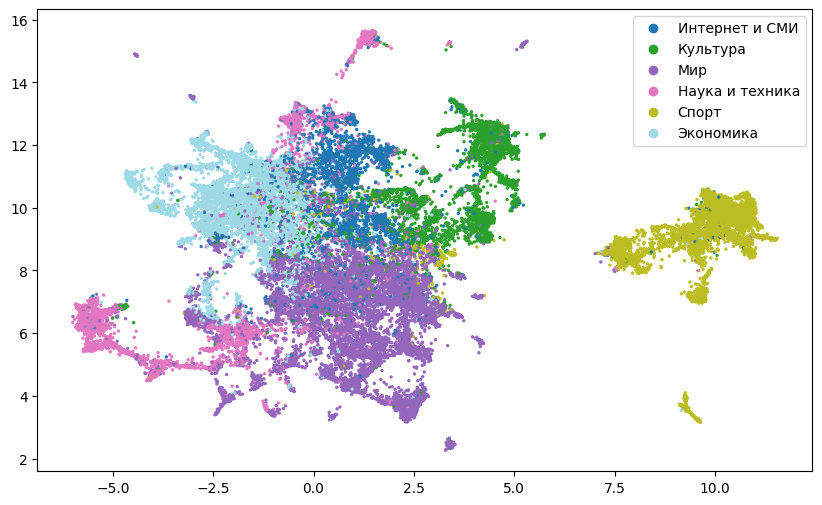

In [8]:
scatter_plot(umap_reduce_dim(tfidf_doc_embs, 2), df['topic'].to_numpy(), labels)

* *визуализируем эмбеддинги документов (TFIDF)*
* *хорошо видны кластеры классов документов*

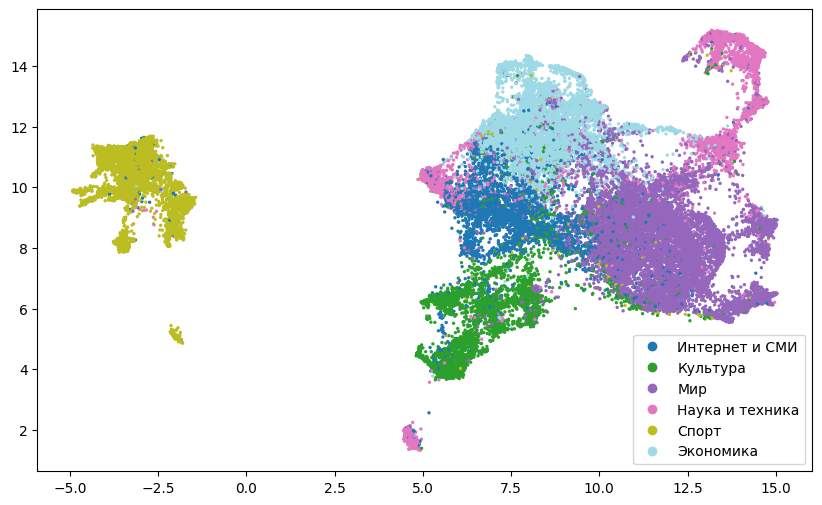

In [ ]:
scatter_plot(umap_reduce_dim(w2v_doc_embs, 2), df['topic'].to_numpy(), labels)

* *визуализируем эмбеддинги документов (Word2Vec)*
* *кластеры классов документов видны еще лучше*